# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Allan              | RM 12345      | `1IA` |
| Bruno             | RM 12345      | `1IA` |
| Mathias             | RM 12345      | `1IA` |
| Roberto             | RM 12345      | `1IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [37]:
#IMPLEMENTAR
dataset = pd.read_csv('data/automobile-mod.csv', sep = ';')
df = dataset.sort_values(['price'])



Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

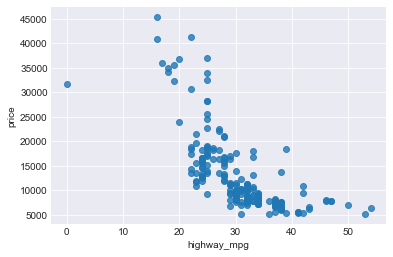

In [38]:
#IMPLEMENTAR
sns.set_style("darkgrid")
sns.regplot(x=df["highway_mpg"], y=df["price"], fit_reg=False)

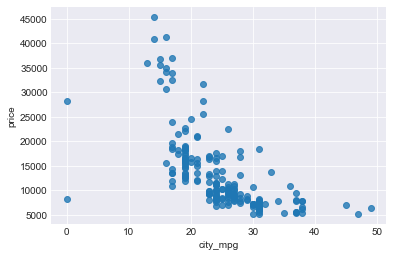

In [39]:
sns.regplot(x=df["city_mpg"], y=df["price"], fit_reg=False)

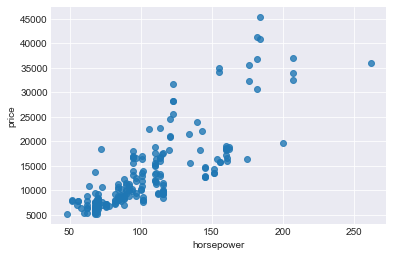

In [23]:
sns.regplot(x=df["horsepower"], y=df["price"], fit_reg=False)

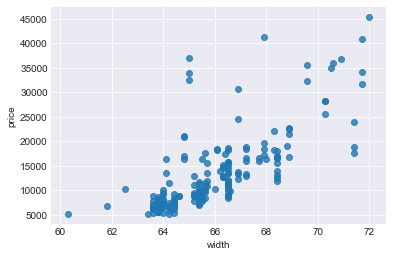

In [40]:
sns.regplot(x=df["width"], y=df["price"], fit_reg=False)

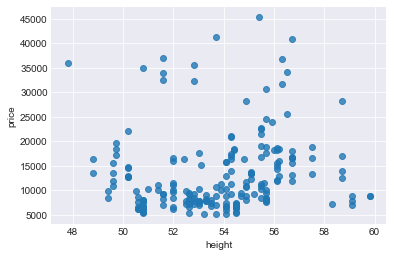

In [41]:
sns.regplot(x=df["height"], y=df["price"], fit_reg=False)

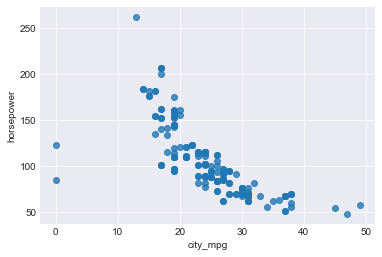

In [42]:
sns.regplot(x=df["city_mpg"], y=df["horsepower"], fit_reg=False)

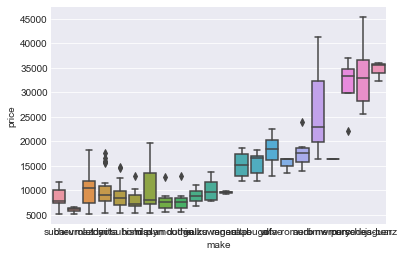

In [43]:
sns.boxplot(x=df["make"], y=df["price"])

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** Horsepower, city_mpg, highway_mpg. Esses três parecem ter algum tipo de relação. No final também fizemos uma separação por marcar, ali é possivel ver que existe alguma relação entre a marca e o preço parece ser relevate

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

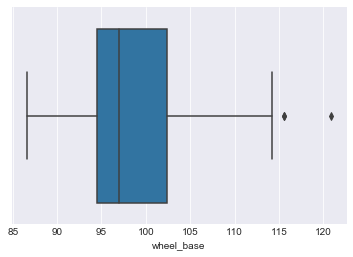

In [58]:
#IMPLEMENTAÇÃO
sns.boxplot(df['wheel_base'])

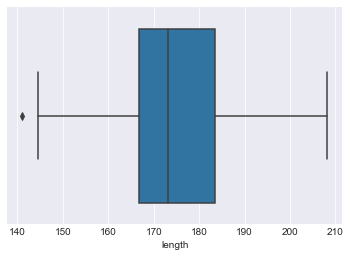

In [59]:
sns.boxplot(df['length'])

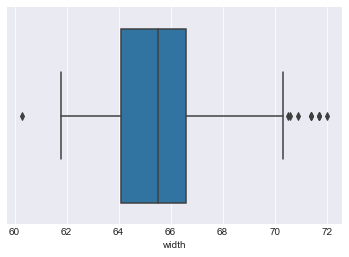

In [60]:
sns.boxplot(df['width'])

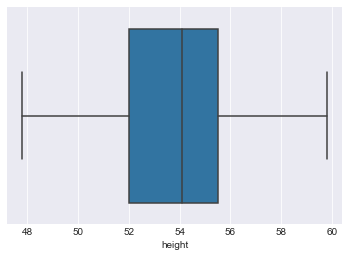

In [61]:
sns.boxplot(df['height'])

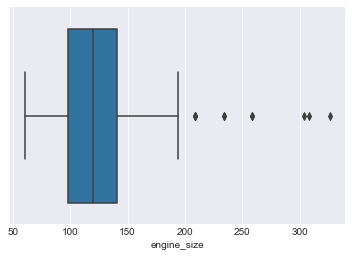

In [66]:
sns.boxplot(df['engine_size'])

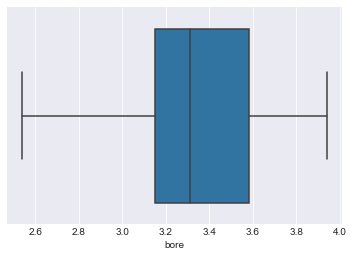

In [68]:
sns.boxplot(df['bore'])

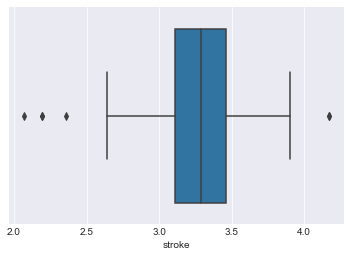

In [69]:
sns.boxplot(df['stroke'])

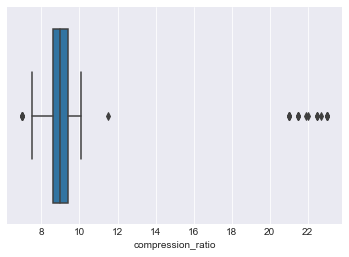

In [70]:
sns.boxplot(df['compression_ratio'])

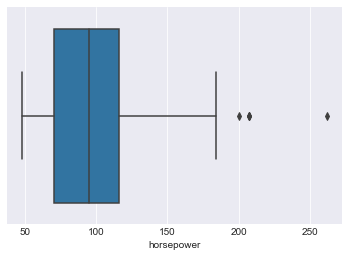

In [71]:
sns.boxplot(df['horsepower'])

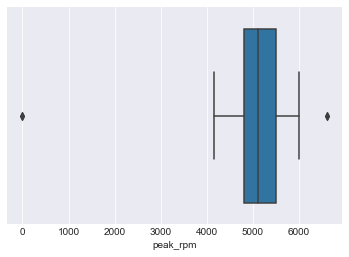

In [72]:
sns.boxplot(df['peak_rpm'])

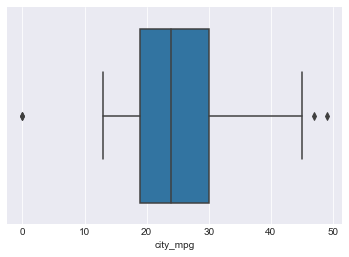

In [73]:
sns.boxplot(df['city_mpg'])

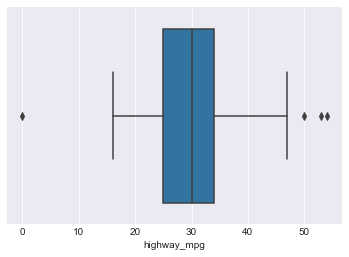

In [74]:
sns.boxplot(df['highway_mpg'])

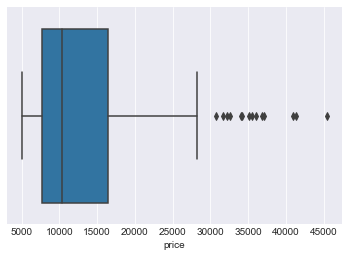

In [75]:
sns.boxplot(df['price'])

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [54]:
#IMPLEMENTAÇÃO
df.isnull().any()



make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [56]:
#IMPLEMENTAÇÃO
df["peak_rpm"] = df["peak_rpm"].replace(np.nan,df["peak_rpm"].mean())
df["city_mpg"] = df["city_mpg"].replace(np.nan,df["city_mpg"].mean())
df["highway_mpg"] = df["highway_mpg"].replace(np.nan,df["highway_mpg"].mean())



Aqui usamos a média para remover os pontos nulos do dataset.

In [57]:
df.isnull().any()

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm               False
city_mpg               False
highway_mpg            False
price                  False
dtype: bool

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [85]:
#IMPLEMENTAÇÃO
print((df == 0).sum())


make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               2
highway_mpg            1
price                  0
dtype: int64


In [86]:
print(df[df.peak_rpm == 0])

     make fuel_type aspiration number_of_doors body_style drive_wheels  \
32  honda       gas        std             two  hatchback          fwd   
35  honda       gas        std            four      wagon          fwd   

   engine_location  wheel_base  length  width  ...    engine_size  \
32           front        93.7   150.0   64.0  ...             92   
35           front        96.5   157.1   63.9  ...             92   

    fuel_system  bore stroke  compression_ratio horsepower  peak_rpm  \
32         1bbl  2.91   3.41                9.2         76       0.0   
35         1bbl  2.92   3.41                9.2         76       0.0   

    city_mpg  highway_mpg  price  
32      30.0       30.545   6529  
35      30.0       34.000   7295  

[2 rows x 24 columns]


In [ ]:
print(df[df.peak_rpm == 0])

In [87]:
print(df[df.city_mpg == 0])

              make fuel_type aspiration number_of_doors body_style  \
181     volkswagen       gas        std            four      sedan   
66   mercedes-benz    diesel      turbo             two    hardtop   

    drive_wheels engine_location  wheel_base  length  width  ...    \
181          fwd           front        97.3   171.7   65.5  ...     
66           rwd           front       106.7   187.5   70.3  ...     

     engine_size  fuel_system  bore stroke  compression_ratio horsepower  \
181          109         mpfi  3.19   3.40                9.0         85   
66           183          idi  3.58   3.64               21.5        123   

     peak_rpm  city_mpg  highway_mpg  price  
181    5250.0       0.0         34.0   8195  
66     4350.0       0.0         25.0  28176  

[2 rows x 24 columns]


In [88]:
print(df[df.highway_mpg == 0])

             make fuel_type aspiration number_of_doors body_style  \
67  mercedes-benz    diesel      turbo            four      sedan   

   drive_wheels engine_location  wheel_base  length  width  ...    \
67          rwd           front       115.6   202.6   71.7  ...     

    engine_size  fuel_system  bore stroke  compression_ratio horsepower  \
67          183          idi  3.58   3.64               21.5        123   

    peak_rpm  city_mpg  highway_mpg  price  
67    4350.0      22.0          0.0  31600  

[1 rows x 24 columns]


A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [89]:
#IMPLEMENTAÇÃO

print(df[df.make == 'mercedes-benz'])



             make fuel_type aspiration number_of_doors   body_style  \
64  mercedes-benz    diesel      turbo            four        sedan   
66  mercedes-benz    diesel      turbo             two      hardtop   
65  mercedes-benz    diesel      turbo            four        wagon   
67  mercedes-benz    diesel      turbo            four        sedan   
68  mercedes-benz       gas        std            four        sedan   
69  mercedes-benz       gas        std             two  convertible   
70  mercedes-benz       gas        std            four        sedan   
71  mercedes-benz       gas        std             two      hardtop   

   drive_wheels engine_location  wheel_base  length  width  ...    \
64          rwd           front       110.0   190.9   70.3  ...     
66          rwd           front       106.7   187.5   70.3  ...     
65          rwd           front       110.0   190.9   70.3  ...     
67          rwd           front       115.6   202.6   71.7  ...     
68          rwd

In [92]:
print(df[df.make == 'honda'])

     make fuel_type aspiration number_of_doors body_style drive_wheels  \
31  honda       gas        std             two  hatchback          fwd   
29  honda       gas        std             two  hatchback          fwd   
32  honda       gas        std             two  hatchback          fwd   
30  honda       gas        std             two  hatchback          fwd   
33  honda       gas        std             two  hatchback          fwd   
34  honda       gas        std            four      sedan          fwd   
35  honda       gas        std            four      wagon          fwd   
36  honda       gas        std             two  hatchback          fwd   
38  honda       gas        std            four      sedan          fwd   
37  honda       gas        std             two  hatchback          fwd   
39  honda       gas        std            four      sedan          fwd   
41  honda       gas        std             two      sedan          fwd   
40  honda       gas        std        

In [94]:
print(df[df.make == 'volkswagen'])

           make fuel_type aspiration number_of_doors   body_style  \
178  volkswagen    diesel        std             two        sedan   
179  volkswagen       gas        std             two        sedan   
180  volkswagen    diesel        std            four        sedan   
181  volkswagen       gas        std            four        sedan   
182  volkswagen       gas        std            four        sedan   
183  volkswagen    diesel      turbo            four        sedan   
186  volkswagen       gas        std             two    hatchback   
184  volkswagen       gas        std            four        sedan   
185  volkswagen       gas        std             two  convertible   
189  volkswagen       gas        std            four        wagon   
187  volkswagen       gas        std            four        sedan   
188  volkswagen    diesel      turbo            four        sedan   

    drive_wheels engine_location  wheel_base  length  width  ...    \
178          fwd           front

In [93]:
df.loc[df.peak_rpm == 0,['peak_rpm']] = 6000
df.loc[df.highway_mpg == 0,['highway_mpg']] = 25
df.loc[(df['city_mpg'] == 0) & (df['make'] == 'volkswagen'),['highway_mpg']] = 27
df.loc[(df['city_mpg'] == 0) & (df['make'] == 'mercedes-benz'),['highway_mpg']] = 22

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [8]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    
    #IMPLEMENTAÇÃO
    
    print(outlier_upper + outlier_lower)

**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**


### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [9]:
#IMPLEMENTAÇÃO

def mapear_serie(serie):
    dict_gen = {}
    
    #IMPLEMENTAÇÃO
        
    return dict_gen

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [10]:
# IMPLEMENTAÇÃO 



Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [11]:
#IMPLEMENTAÇÃO



## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

In [1]:
#IMPLEMENTAÇÃO
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [2]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [3]:
#IMPLEMENTAÇÃO
#Inspeção de X_train

X_train.head()

In [4]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
y_train.head()


Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [5]:
#IMPLEMENTAÇÃO



## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [18]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [10]:
#IMPLEMENTAÇÃO



### Regressão de árvore de Decisão

In [17]:
from sklearn import tree

dtr_model = tree.DecisionTreeRegressor()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [13]:
#IMPLEMENTAÇÃO



### Regressão Ridge

In [16]:
lrr_model = linear_model.Ridge()

#IMPLEMENTAÇÃO



Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [19]:
#IMPLEMENTAÇÃO



**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [ ]:
from sklearn.model_selection import GridSearchCV
        
parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

Calcule as pontuações para o melhor estimador com dados de treino.

In [ ]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

E também para os dados de testes.

In [ ]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

### Regulação do Modelo de Regressão de Árvore de Decisão

In [ ]:
parameters = {}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

Pontuação dos dados de treino.

In [21]:
#IMPLEMENTAÇÃO



Pontuação dos dados de teste.

In [22]:
# IMPLEMENTAÇÃO



### Regulação do Modelo de Regressão Ridge

In [ ]:
parameters = {}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

Pontuação dos dados de treino.

In [ ]:
#IMPLEMENTAÇÃO



Pontuação dos dados de teste.

In [24]:
#IMPLEMENTAÇÃO



Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |      X           |      X                       |   X              |
| R2 teste  |      X            |      X                       |   X              |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [26]:
#IMPLEMENTAÇÃO



### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [ ]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

feature_col_names

In [29]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

test_example_1 = [[]]
test_example_2 = [[]]
test_example_3 = [[]]


## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**: